In [1]:
import requests
import re
import matplotlib.pyplot as plt
data = []
for i in range(1, 13):
    url = "https://canvas.letovo.ru/api/v1/courses?access_token=DFZiKJ5QRx1CWNnNXMhTl3vAIsyJN9sOXGeHCNwGDF0ZTt1DXpX47IcW2ojM5mXO&page=" + str(i)
    response = requests.get(url)
    lst = response.json()
    if response.status_code == 200: 
        data.append(lst)
print(data)


[[{'id': 2390, 'name': 'Алгебра 9.5 - Ленская Н.А. (2021-2022)', 'account_id': 5, 'uuid': 'uISb46bkB26oeJs2WgQo6FmqEiOvdMV7OunsYQi5', 'start_at': '2021-09-01T21:00:00Z', 'grading_standard_id': None, 'is_public': False, 'created_at': '2021-09-02T09:30:36Z', 'course_code': 'Алгебра 9.5', 'default_view': 'modules', 'root_account_id': 1, 'enrollment_term_id': 8, 'license': 'private', 'grade_passback_setting': None, 'end_at': None, 'public_syllabus': False, 'public_syllabus_to_auth': False, 'storage_quota_mb': 1000, 'is_public_to_auth_users': False, 'apply_assignment_group_weights': False, 'calendar': {'ics': 'https://canvas.letovo.ru/feeds/calendars/course_uISb46bkB26oeJs2WgQo6FmqEiOvdMV7OunsYQi5.ics'}, 'time_zone': 'Europe/Moscow', 'blueprint': False, 'enrollments': [{'type': 'student', 'role': 'StudentEnrollment', 'role_id': 24, 'user_id': 1640, 'enrollment_state': 'active', 'limit_privileges_to_course_section': False}], 'hide_final_grades': False, 'workflow_state': 'available', 'restric

In [2]:
counter = 0
for i in data:
    for j in i:
        counter += 1
print(counter)

112


Text(0.5, 1.0, 'Распределение по предметам')

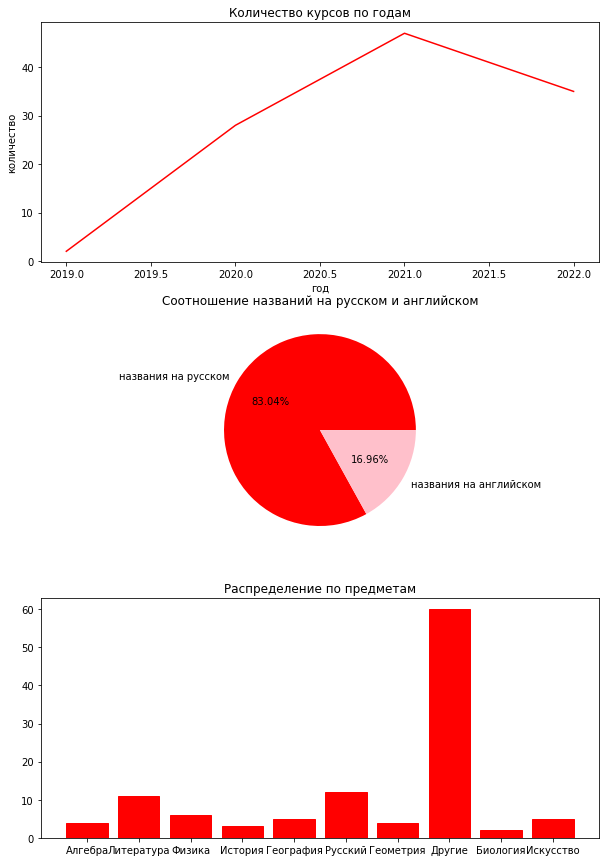

In [23]:
d1 = {2019:0, 2020:0, 2021:0, 2022:0}
for i in data:
    for j in i:
        t = j["start_at"]
        t = t.split("-")
        t = int(t[0])
        d1[t] += 1

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
courses = list(d1.keys())
values = list(d1.values())
axs[0].plot(courses, values, color="r")
axs[0].set_title("Количество курсов по годам")
axs[0].set_xlabel("год")
axs[0].set_ylabel("количество")

counter_eng = 0
counter_rus = 0
for i in data:
    for j in i:
        if (re.search('[a-zA-Z]', j["name"])) == None:
            counter_rus += 1
        else:
            counter_eng += 1
lst1 = [counter_rus, counter_eng]
lst2 = ["названия на русском", "названия на английском"]
axs[1].pie(lst1, labels = lst2, autopct='%1.2f%%', radius=1,  colors = ['red', 'pink'])
axs[1].set_title("Соотношение названий на русском и английском")

d = {'Алгебра':0, 'Литература':0, 'Физика':0, 'История':0, 'География':0, 'Русский':0, 'Геометрия':0, 'Другие':0, "Биология":0, "Искусство":0}
for i in data:
    for j in i:
        if j["name"][0:3] == "Алг":
            d["Алгебра"] += 1
        elif j["name"][0:3] == "ЛИТ":
            d["Литература"] += 1
        elif j["name"][0:4] == "Физи":
            d["Физика"] += 1
        elif j["name"][0:3] == "Ист":
            d["История"] += 1
        elif j["name"][0:4] == "Геог":
            d["География"] += 1
        elif j["name"][0:2] == "РЯ":
            d["Русский"] += 1
        elif j["name"][0:4] == "Геом":
            d["Геометрия"] += 1
        elif j["name"][0:3] == "Био":
            d["Биология"] += 1
        elif j["name"][0:3] == "Иск":
            d["Искусство"] += 1
        else:
            d["Другие"] += 1
courses = list(d.keys())
values = list(d.values())
barlist = axs[2].bar(courses, values)
for i in range(10):
    barlist[i].set_color('r')


axs[2].set_title("Распределение по предметам")

